In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
feature_data_file = "/home/jeffrey/repos/VSB_Power_Line_Fault_Detection/"+"train_features.csv"
df = pd.read_csv(feature_data_file)
df.head()

,Unnamed: 0,signal_id,measurement_id,entropy,n5,n25,n75,n95,median,mean,std,var,rms,no_zero_crossings,no_mean_crossings,fault
0,0,0,0,13.592362,1704,1704,-0.00026,-0.000114,0.000107,0.000263,-0.000009,8.057869e-11,0.184792,0.034148,0.003441,0
1,1,1,0,13.592362,1704,1704,-0.00026,-0.000114,0.000107,0.000263,-0.000009,8.057869e-11,0.184792,0.034148,0.003441,0
2,2,2,0,13.592362,1704,1704,-0.00026,-0.000114,0.000107,0.000263,-0.000009,8.057869e-11,0.184792,0.034148,0.003441,0
3,3,3,1,13.592366,83640,83640,-0.04715,-0.002776,0.002741,0.047790,-0.000006,4.885218e-08,0.491987,0.242051,0.032311,1
4,4,4,1,13.592366,83640,83640,-0.04715,-0.002776,0.002741,0.047790,-0.000006,4.885218e-08,0.491987,0.242051,0.032311,1


In [33]:
df.describe()

,Unnamed: 0,signal_id,measurement_id,entropy,n5,n25,n75,n95,median,mean,std,var,rms,no_zero_crossings,no_mean_crossings,fault
count,8712.000000,8712.000000,8712.000000,8712.000000,8712.000000,8712.000000,8.712000e+03,8.712000e+03,8.712000e+03,8.712000e+03,8.712000e+03,8.712000e+03,8.712000e+03,8.712000e+03,8.712000e+03,8712.000000
mean,4355.500000,4355.500000,1451.500000,13.592365,48386.918733,48386.949725,-1.008752e-01,-1.846909e-02,1.847288e-02,1.008095e-01,8.247721e-06,-4.256328e-08,9.530333e-01,3.426156e+00,9.193069e-02,0.060262
std,2515.082106,2515.082106,838.360658,0.000001,36276.873452,36276.861179,1.302390e-01,2.997280e-02,3.001128e-02,1.299670e-01,6.915857e-04,1.763777e-06,1.586875e+00,9.420117e+00,1.523041e-01,0.237985
min,0.000000,0.000000,0.000000,13.592355,34.000000,34.000000,-2.354483e+00,-2.339694e-01,6.053030e-08,1.370588e-07,-9.824586e-03,-8.539340e-05,9.544759e-08,9.110242e-15,6.810107e-08,0.000000
25%,2177.750000,2177.750000,725.750000,13.592366,12229.000000,12229.000000,-1.806440e-01,-2.205646e-02,2.317252e-04,4.697872e-03,-1.278214e-05,-9.762487e-09,1.342308e-01,1.801792e-02,9.351795e-03,0.000000
50%,4355.500000,4355.500000,1451.500000,13.592366,54069.000000,54069.000000,-5.045261e-02,-4.454096e-03,4.494597e-03,5.065260e-02,-8.507510e-09,2.193393e-11,2.971265e-01,8.828414e-02,4.288353e-02,0.000000
75%,6533.250000,6533.250000,2177.250000,13.592366,75682.500000,75682.500000,-4.755854e-03,-2.333478e-04,2.205248e-02,1.815040e-01,1.308338e-05,1.376377e-08,7.771028e-01,6.038894e-01,1.025146e-01,0.000000
max,8711.000000,8711.000000,2903.000000,13.592366,391019.000000,391023.000000,-1.646838e-07,-3.625616e-08,2.334393e-01,2.321572e+00,8.042374e-03,1.021249e-05,1.028032e+01,1.056850e+02,1.814438e+00,1.000000


In [39]:
df["fault"].value_counts()/len(df)  # imbalanced data set

0    0.939738
1    0.060262
Name: fault, dtype: float64

In [31]:
from sklearn.preprocessing import normalize
feature_matrix_columns = ["entropy", "median", "mean", "std", "var", "rms", "no_zero_crossings", "no_mean_crossings", "fault"]
#feature_matrix_columns = ["median", "mean", "std", "var", "rms", "no_zero_crossings", "no_mean_crossings", "fault"]
#feature_matrix_columns = ["entropy", "fault"]


df2 = df[feature_matrix_columns]
df_n = normalize(df2, axis=0)

df2.head()

,entropy,median,mean,std,var,rms,no_zero_crossings,no_mean_crossings,fault
0,13.592362,0.000107,0.000263,-0.000009,8.057869e-11,0.184792,0.034148,0.003441,0
1,13.592362,0.000107,0.000263,-0.000009,8.057869e-11,0.184792,0.034148,0.003441,0
2,13.592362,0.000107,0.000263,-0.000009,8.057869e-11,0.184792,0.034148,0.003441,0
3,13.592366,0.002741,0.047790,-0.000006,4.885218e-08,0.491987,0.242051,0.032311,1
4,13.592366,0.002741,0.047790,-0.000006,4.885218e-08,0.491987,0.242051,0.032311,1


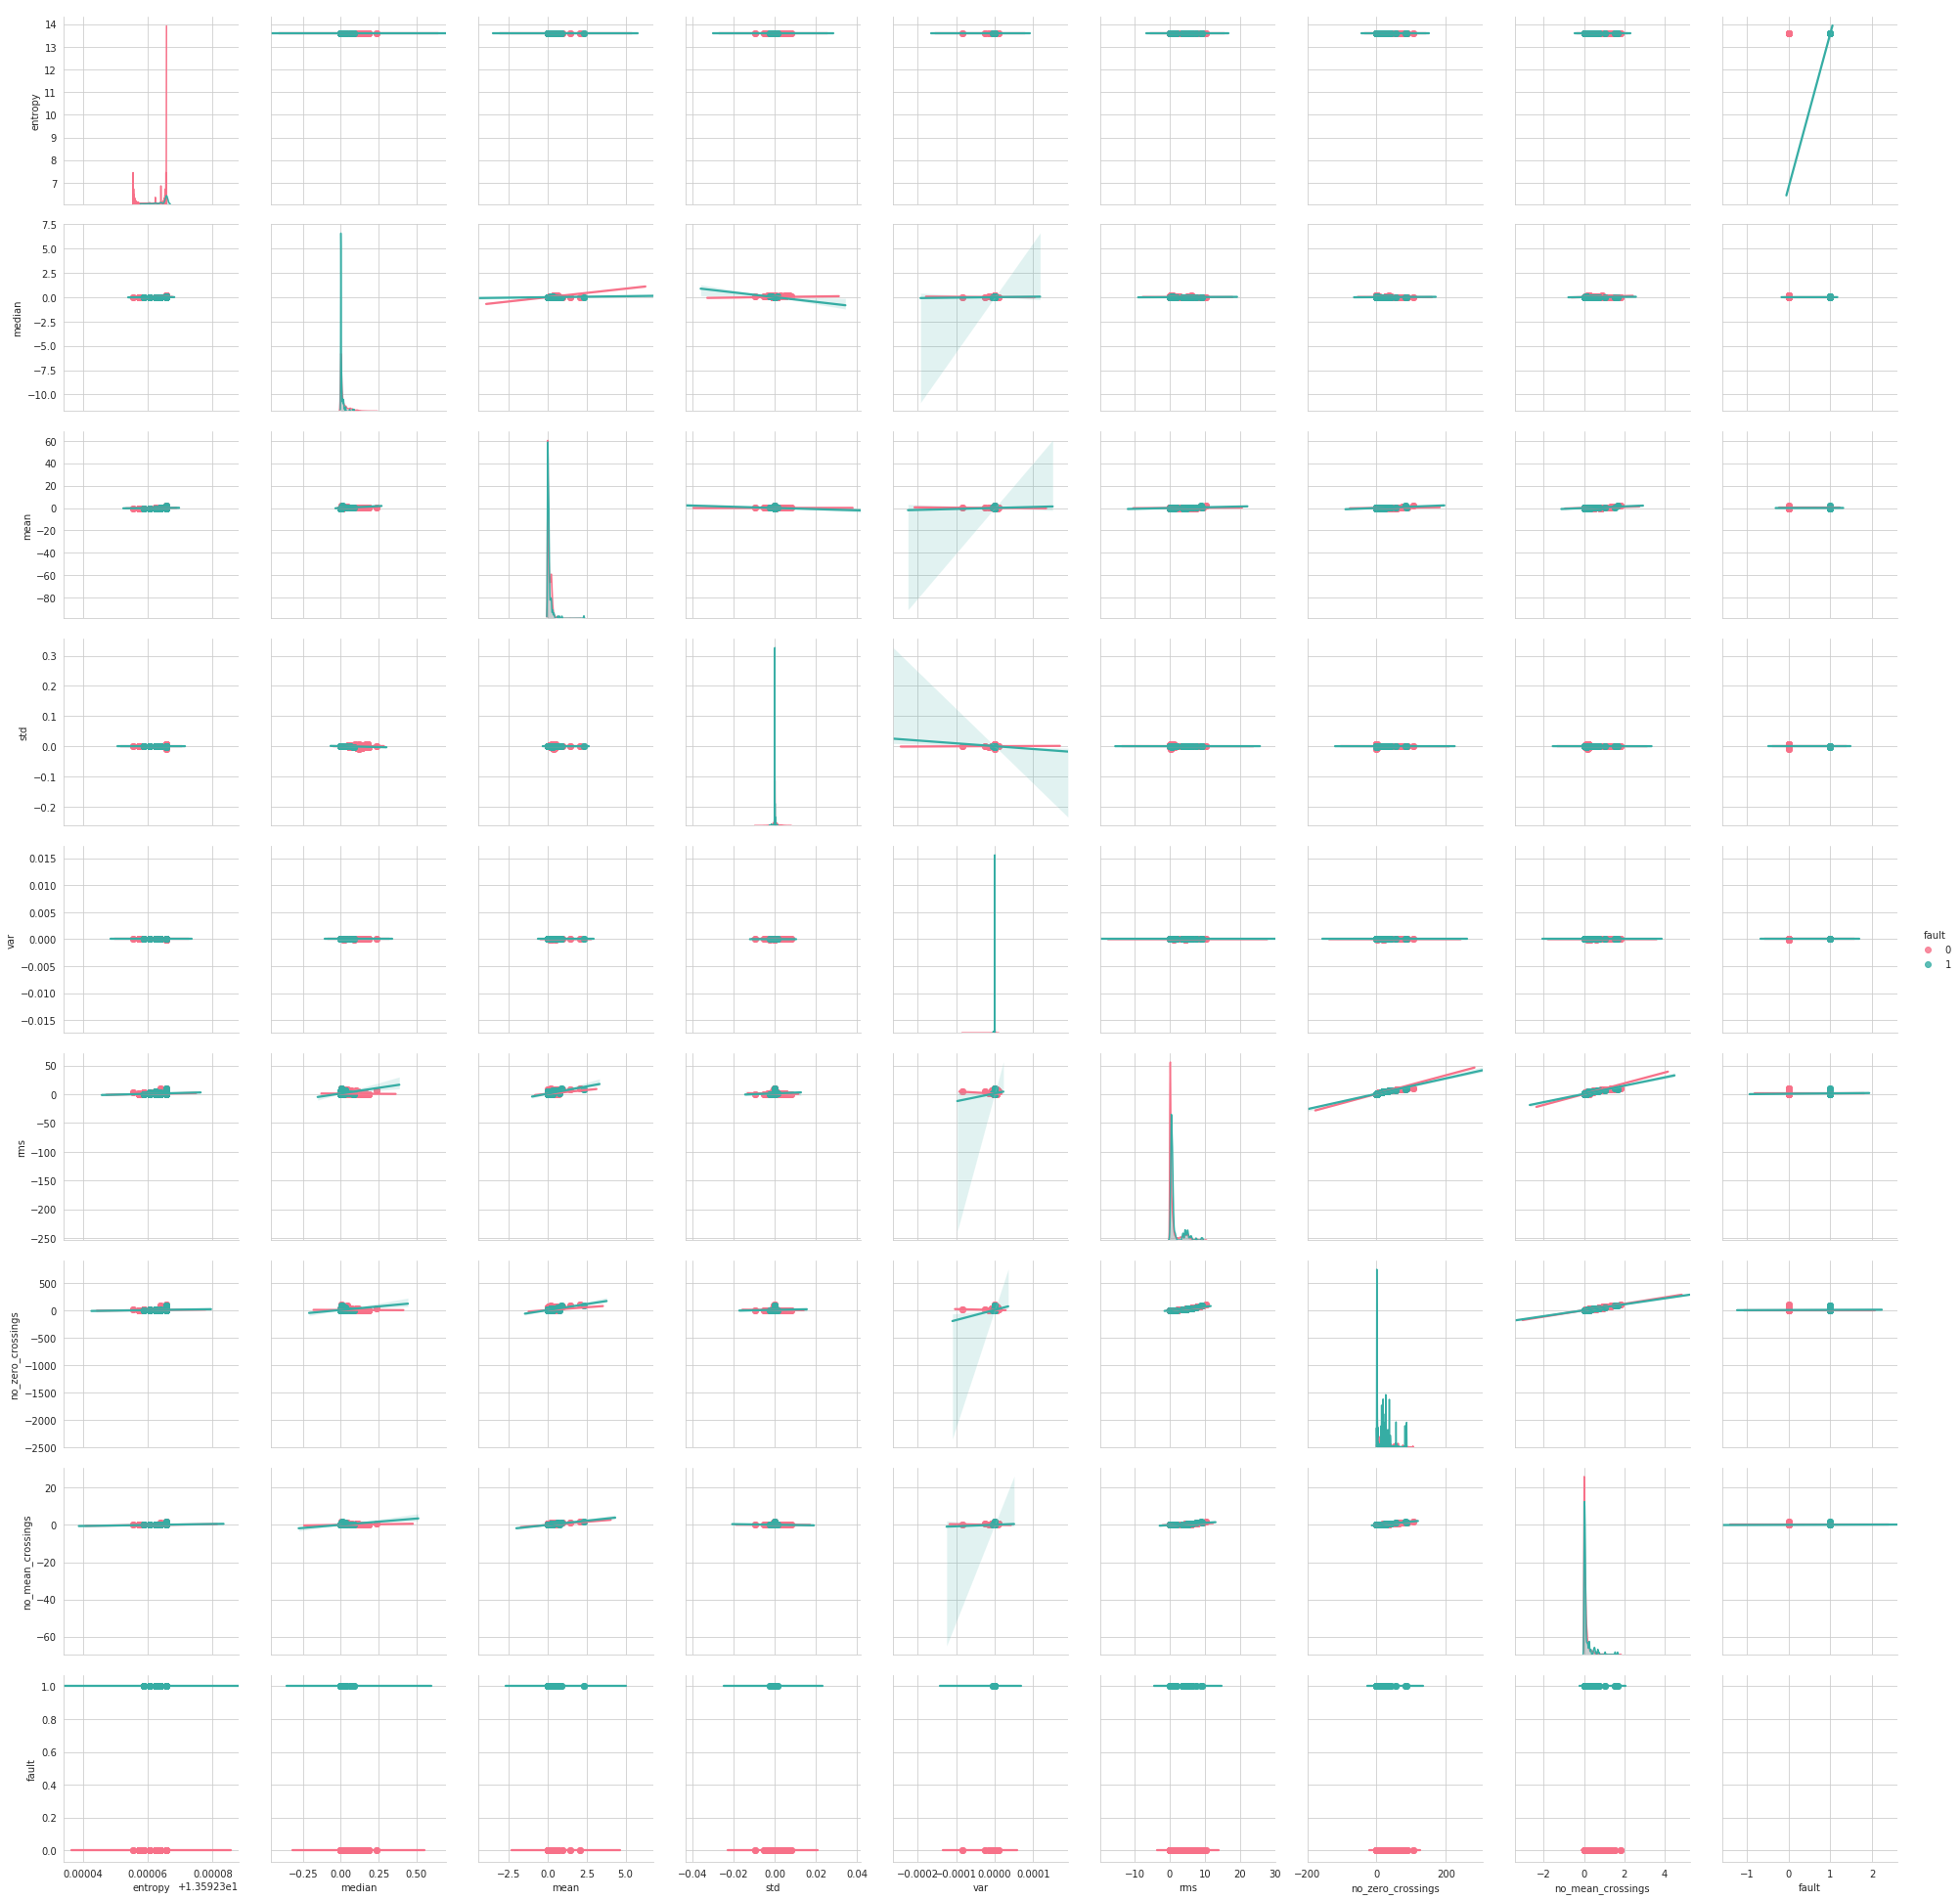

In [44]:
sns.set_style("whitegrid")
#g = sns.PairGrid(df2)  # Create a Pair Grid Instance
#g.map_upper(sns.regplot, color="#51ACC5")
#g.map_diag(sns.kdeplot, legend=False, shade=True)
#g.map_lower(sns.kdeplot, shade=False, cmap="Blues")

sns.pairplot(df2, diag_kind="kde", kind="reg", hue="fault", palette="husl", height=3)